<a href="https://colab.research.google.com/github/ihagoSantos/machine_learning/blob/main/data_transformation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base de dados do Gazola de imóveis em São Paulo
A base possui 14 campos: um identificador, 11 atributos e 2 rótulos (Cub e Preço $)
## Upload de Arquivos Local
Deve-se fazer o upload do arquivo "Gazola_dados_apartamento_resumo.xls" disponível na pasta "Datasets".

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [3]:
# Configuração de visualização
np.set_printoptions(threshold=None, precision=2)

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Gazola_dados_apartamento_resumo.xls to Gazola_dados_apartamento_resumo.xls


In [4]:
gazola = pd.read_excel(next(iter(uploaded.keys())), sheet_name=1)
print("Dimensões: \n{0}\n".format(gazola.shape))
print("Campos: \n{0}\n".format(gazola.keys()))
print("Tipos de dados: \n{0}\n".format(gazola.dtypes))
print(gazola.describe(percentiles=[]))

Dimensões: 
(397, 14)

Campos: 
Index(['imóvel', 'DepEmp', 'Conserv', 'Classif', 'Elev', 'RegHom', 'Suíte',
       'Garag', 'Dorm', 'Idade', 'Energia', 'Artot', 'Cub', 'Preço($)'],
      dtype='object')

Tipos de dados: 
imóvel        int64
DepEmp        int64
Conserv       int64
Classif       int64
Elev          int64
RegHom        int64
Suíte         int64
Garag         int64
Dorm          int64
Idade         int64
Energia       int64
Artot       float64
Cub         float64
Preço($)    float64
dtype: object

       imóvel  DepEmp  Conserv  Classif    Elev  RegHom   Suíte   Garag  \
count  397.00  397.00   397.00   397.00  397.00  397.00  397.00  397.00   
mean   199.00    1.39     3.01     1.93    1.83    5.54    1.61    1.99   
std    114.75    0.49     1.02     0.61    0.38    1.97    0.49    0.56   
min      1.00    1.00     1.00     1.00    1.00    1.00    1.00    1.00   
50%    199.00    1.00     3.00     2.00    2.00    6.00    2.00    2.00   
max    397.00    2.00     4.00    

# Preparando a base para o treinamento
é necesário remover o identificador, retirar o Cup e definir o preço como atributo alvo


Base de treinamento: (357, 11)
!Base de teste:(40, 11)


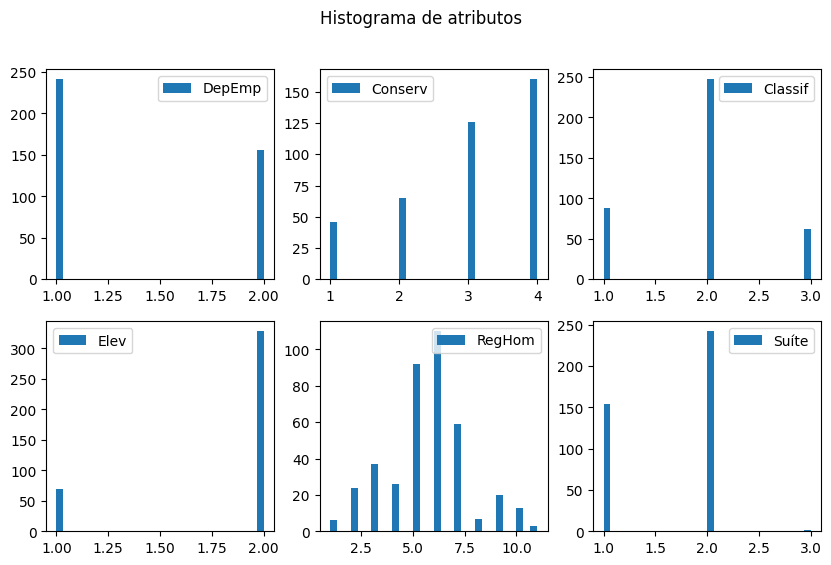

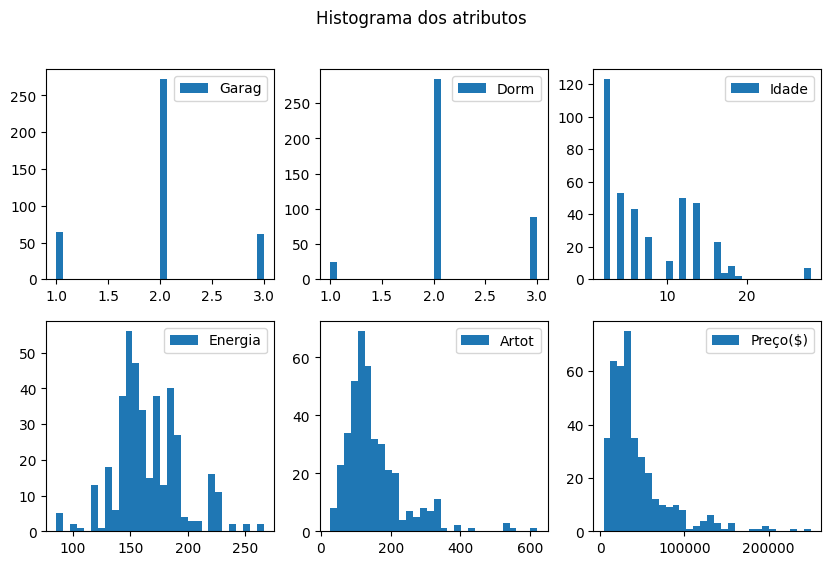

In [9]:
X = gazola.iloc[:, 1:(gazola.shape[1] - 2)]
y = gazola.iloc[:,(gazola.shape[1] - 1)]

# Recupera o nome dos atributos
atributos = list(gazola)[1: (gazola.shape[1] - 2)]
rotulo = list(gazola)[(gazola.shape[1] - 1)]

# Exibe o histograma dos atributos
fig, ax = plt.subplots(2, 3, figsize=(10,6))
plt.suptitle("Histograma de atributos")

for i in range(2):
  for j in range(3):
    ax[i,j].hist(X.iloc[:, (i*3 + j)], label=atributos[i*3 + j], bins=30)
    ax[i,j].legend()

fig, ax = plt.subplots(2,3,figsize=(10,6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
  for j in range(3):
    if j == 2 and i == 1:
      ax[i,j].hist(y.iloc[:], label=rotulo, bins=30)
    else:
      ax[i,j].hist(X.iloc[:, (i*3 + j+6)], label=atributos[i*3 + j+6], bins=30)
    ax[i,j].legend()

# Amostragem de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
print("Base de treinamento: {0}".format(X_train.shape))
print("!Base de teste:{0}".format(X_test.shape))

# Treinamento por Regressão Linear
fit() realiza o ajusto do modelo (treinamento).
predict() aplica o modelo sobre novos dados.

Acurácia da base de treinamento: 0.92
Acurácia da base de testes: 0.82
Descrição do modelo: 
w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57'] b:-15469.97
Números de atributos usados: 11
Erro percentual: 
 Média: 0.25 Max: 0.87 Min:0.00


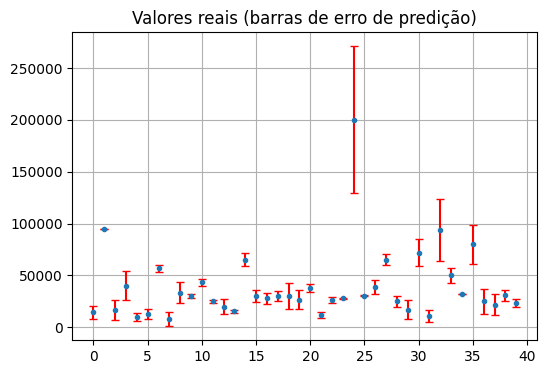

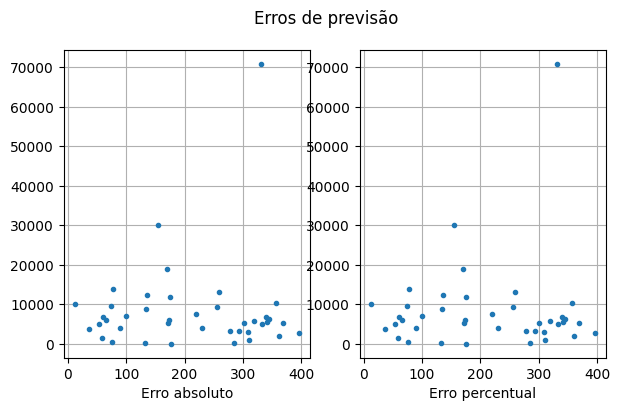

In [11]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
y_prev = lnr.predict(X_test)

print("Acurácia da base de treinamento: {:.2f}".format(lnr.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(lnr.score(X_test, y_test)))

print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a,v) for a, v in zip(atributos, lnr.coef_)]
print("w: {} b:{:.2f}".format(s, lnr.intercept_))
print("Números de atributos usados: {}".format(np.sum(lnr.coef_ != 0)))

# Calcula o erro absoluto e o erro percentual da regressao linear
errolnr = np.abs(y_test - y_prev)
erroperc = errolnr / list(y_test)

print("Erro percentual: \n Média: {0:.2f} Max: {1:.2f} Min:{2:.2f}".format(np.mean(erroperc), np.max(erroperc), np.min(erroperc)))

plt.figure(figsize=(6,4))
plt.errorbar(np.arange(y_test.size), list(y_test), yerr=errolnr, fmt='.', ecolor='r', capsize=3)
plt.title('Valores reais (barras de erro de predição)')
plt.grid()

fig, ax = plt.subplots(1,2, figsize=(7,4))
plt.suptitle("Erros de previsão")
ax[0].plot(errolnr,'.')
ax[0].set_xlabel("Erro absoluto")
ax[0].grid()
ax[1].plot(errolnr,'.')
ax[1].set_xlabel("Erro percentual")
ax[1].grid()

# Transformação de dados numéricos


 ---------------- Regressão Linear Normalizada -----------------
Acurácia da base de treinamento: 0.94
Acurácia da base de testes: 0.92
Descrição do modelo: 
w: ['DepEmp: 0.06', 'Conserv: 0.11', 'Classif: 0.19', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.08', 'Garag: 0.05', 'Dorm: -0.00', 'Idade: 0.03', 'Energia: -0.16', 'Artot: 1.39'] b: 3.31

 ---------------- Comparação de pesos ------------------
Original: 
 w:['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57'] b: -15469.97
Normalizados: 
 w: ['DepEmp: 0.06', 'Conserv: 0.11', 'Classif: 0.19', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.08', 'Garag: 0.05', 'Dorm: -0.00', 'Idade: 0.03', 'Energia: -0.16', 'Artot: 1.39'] b: 3.31


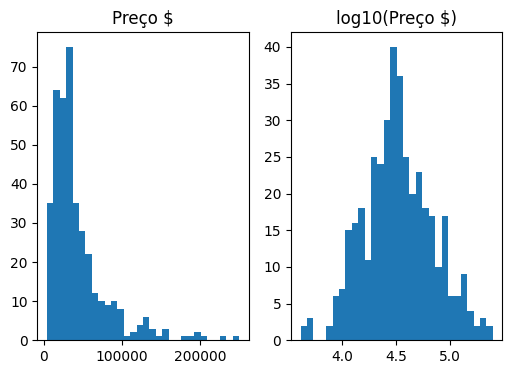

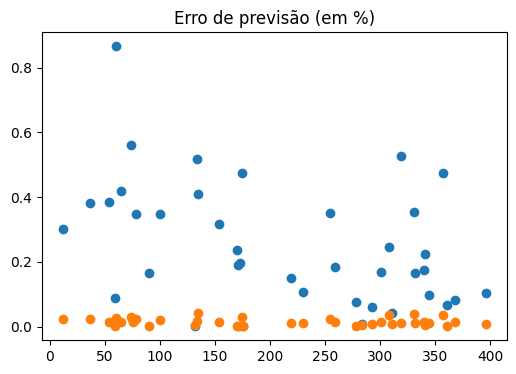

In [15]:
# Os atributos possuem faixas de valores diferentes, que influencia os pesos
# dos coeficientes da regressão. Vamos trabalhar melhor os atributos.

X_scale = X
# Iremos aplicar o logaritmo em "Energia total", "Área total" e "Preço $"
X_scale['Energia'] = np.log10(X['Energia'])
X_scale['Artot'] = np.log10(X['Artot'])
y_scale = np.log10(y)

# Normal9ização Min-Max dos dados.

min_max_scaler = preprocessing.MinMaxScaler() # coloca todos os valores na faixa entre 0 e 1
min_max_scaler.fit(X_scale)
X_scale = min_max_scaler.transform(X_scale)

fig, ax = plt.subplots(1,2, figsize=(6,4))
ax[0].hist(y, bins=30, label='Preço $')
ax[0].set_title('Preço $')
ax[1].hist(y_scale, bins=30, label='log10(Preço $)')
ax[1].set_title('log10(Preço $)')

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale, y_scale, test_size=0.1, random_state=0)
lnr2 = LinearRegression().fit(X_train2, y_train2)
y_prev2 = lnr2.predict(X_test2)

errolnr2 = np.abs(y_test2 - y_prev2)
errolnr2perc = np.abs(y_test2 - y_prev2)/y_test2

plt.figure(figsize=(6,4))
plt.plot(erroperc, 'o', label='Regressão com atrib. originais')
plt.plot(errolnr2perc, 'o', label='Regressão com artib. normalizados')
plt.title('Erro de previsão (em %)')

print("\n ---------------- Regressão Linear Normalizada -----------------")
print("Acurácia da base de treinamento: {:.2f}".format(lnr2.score(X_train2, y_train2)))
print("Acurácia da base de testes: {:.2f}".format(lnr2.score(X_test2, y_test2)))
print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a,v) for a,v  in zip(atributos, lnr2.coef_)]
print("w: {} b: {:.2f}".format(s, lnr2.intercept_))

print("\n ---------------- Comparação de pesos ------------------")
s = ["{0}: {1:0.2f}".format(a,v) for a,v in zip(atributos, lnr.coef_)]
print("Original: \n w:{} b: {:.2f}".format(s, lnr.intercept_))
s = ["{0}: {1:0.2f}".format(a,v) for a,v in zip(atributos, lnr2.coef_)]
print("Normalizados: \n w: {} b: {:.2f}".format(s, lnr2.intercept_))